<a href="https://colab.research.google.com/github/auiee/1.21/blob/main/Stable%20deffusion%20AI%E3%82%A4%E3%83%A9%E3%82%B9%E3%83%88%E7%94%9F%E6%88%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**手順1 モデルの読み込み**

すべて完了するまで待ちます。

In [1]:
!pip install --upgrade diffusers transformers accelerate

from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
from IPython.display import Image, display_png
from PIL.PngImagePlugin import PngInfo
import torch
import random

# AIモデル
model_id = "stablediffusionapi/anything-v5" #@param {type:"string"}
# Sampler
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")

pipe = StableDiffusionPipeline.from_pretrained(
model_id,
scheduler=scheduler
).to('cuda')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


**手順2 画像生成**

*設定方法*

prompt : 生成したい画像のプロンプト

negative_prompt : 生成したい画像に含めたくないもの

count : 生成する枚数

steps : 画像生成のステップ数 20以上を推奨 多いほど生成に時間がかかります

width_size : 横幅

height_size : 縦幅

scale : プロンプトと画像の関連度 3~8あたりがおすすめ

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['including one thumb ), intricate, ( anime coloring, beautifully detailed face ), masterpiece, ultra detailed, high resolution, super fine illustration, distinct, beautiful background, high quality, score _ 9 _ up, thin lines, animation style, art style']


  0%|          | 0/25 [00:00<?, ?it/s]

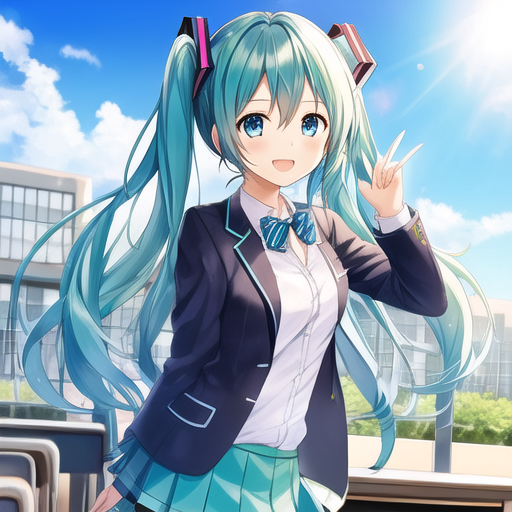

In [36]:
# プロンプト
prompt = "((1girl)), hatsune miku, vibrant, dynamic angle,(from front), colored inner hair, blue sky, Bright,(beautiful eyes), blazer, (long skirt),(lori:0.5), flat chest, school uniform, (dynamic pose), smile, school daily life,hand, school,classroom,desk, (detailed hand is five fingers including one thumb), intricate, (anime coloring, beautifully detailed face), masterpiece, ultra detailed, high resolution, super fine illustration, distinct, beautiful background, high quality, score_9_up, thin lines, animation style,  art style" #@param {type:"string"}
# ネガティブプロンプト
negative_prompt = "((nsfw)), Error balance, abnormal balance, funny balance, abnormal human body structure, anatomically wrong, long neck, deformed, mutated, mutation, ugly, disfigured, poorly drawn face, skin blemishes, skin spots, acne, the wrong limb, lowers, bad anatomy, bad hands, text, error, missing fingers, extra digit,Excess fingers, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry,Black line,Excess hands, extra hands, jpeg artifacts" #@param {type:"string"}

# 画像枚数｜カウント数
count = 1 #@param {type:"number"}
# ステップ数
steps = 25 #@param {type:"number"}
# 横サイズ
width_size = 512 #@param {type:"number"}
# 縦サイズ
height_size = 512 #@param {type:"number"}
# スケール数
scale = 7 #@param {type:"number"}

for i in range(count):
    image = pipe(prompt,
                 num_inference_steps=steps,
                 width=width_size,
                 height=height_size,
                 guidance_scale=scale,
                 negative_prompt=negative_prompt).images[0]
    metadata = PngInfo()
    metadata.add_text("prompt",prompt)
    metadata.add_text("negative_prompt",negative_prompt)
    image.save(f"/content/{i}.png", pnginfo=metadata)
    display_png(Image(f"/content/{i}.png"))

In [3]:
!nvidia-smi

Tue Mar 25 12:43:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   81C    P0             47W /   70W |    7922MiB /  15360MiB |     36%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----